In [3]:
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plotter

# Drawing signal spectrum :: FFT command

In [5]:
# Sampling frequency
Fs = 100
# We use dot when dividing so it knows it will be a float
t = sp.arange(0,2,1./Fs)

In [8]:
# We define a signal
x = sp.cos(2*sp.pi*t*2)  + sp.cos(2*sp.pi*11*t)
# Applying the fft to our signal
X = sp.fft(x) 

<Container object of 3 artists>

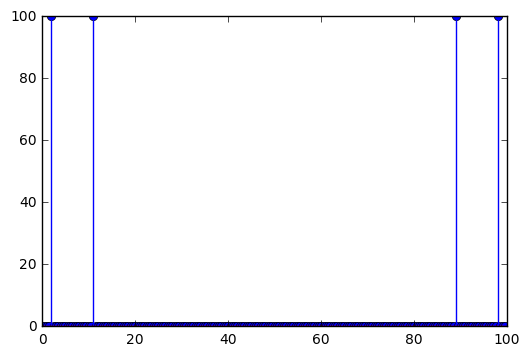

In [10]:
# Creating frequency axis
F = sp.linspace(0,Fs, len(X)+1)
F = F[:-1]

plt.stem(F,sp.absolute(X))

In [27]:
N = len(X)

<Container object of 3 artists>

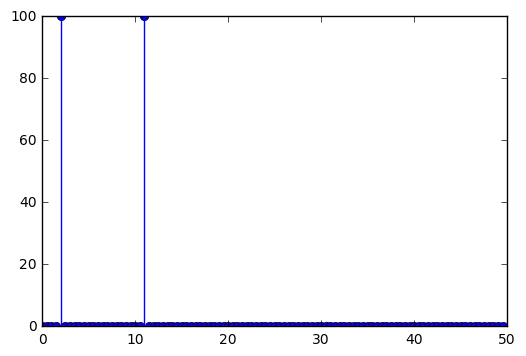

In [29]:
# Now we want just the first part of the spectrum
plotter.stem(F[0:int(N/2)], sp.absolute(X[0:int(N/2)])) 
# had to cast to int to avoid error since it expected int but we gave it float

In [30]:
# Defining signal that has a DC component
x1 = 3+ sp.cos(2*sp.pi*t*2)  + sp.cos(2*sp.pi*11*t) 

In [31]:
X1 = sp.fft(x1)

<Container object of 3 artists>

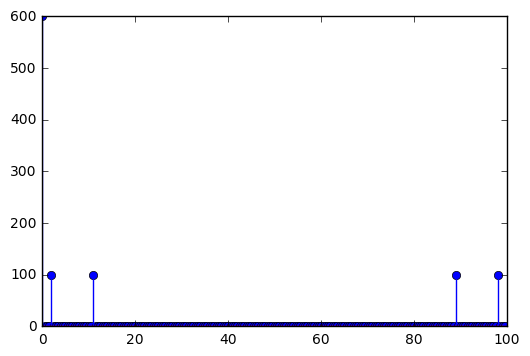

In [32]:
# Drawing spectrum. Take a look at the value at 0Hz 
plt.stem(F, sp.absolute(X1))

In [ ]:
# Now we need to take the useful part of spectrum
# In practice signal length is taken as even number, its often a squar
plotter.stem(F[0:int(N/2)], sp.absolute(X1[0:int(N/2)]))